In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [47]:
# Lines with incorrect comma number ignored.
ufo_data = pd.read_csv("complete.csv", on_bad_lines='skip')
print(ufo_data.shape)

(88679, 11)


C:\Users\alden\AppData\Local\Temp\ipykernel_42144\1916950697.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("complete.csv", on_bad_lines='skip')


In [48]:
# We check here how many lines were lost due to incorrect commas.
# It was about 0.22% of lines.
file_length = len(open("complete.csv", "r").readlines())
bad_line_count = file_length - len(ufo_data)
print("File Length: " + str(file_length))
print("Bad Line Count: " + str(bad_line_count))
print("Bad Percentage: " + str(bad_line_count / file_length * 100) + "%")

File Length: 88876
Bad Line Count: 197
Bad Percentage: 0.2216571402853414%


In [49]:
na_ufo_data = ufo_data[
    (ufo_data["country"] == "us")
    |
    (ufo_data["city"].str.endswith("(mexico)"))
    |
    (ufo_data["city"].str.endswith("(canada)"))
    ]
print("US Data Length: " + str(len(na_ufo_data)))

US Data Length: 74515


In [50]:
print(na_ufo_data["city"].isna().sum())

0


In [51]:
# No missing state data
missing_state_count = na_ufo_data["state"].isna().sum()
print("Missing States: " + str(missing_state_count))

# Checked for fake states and there were none; 52 unqiue states included Puerto
# Rico and Washington DC.
print(na_ufo_data["state"].value_counts())
print(na_ufo_data.shape)

Missing States: 281
state
ca    9577
wa    4292
fl    4155
tx    3742
ny    3234
      ... 
pe      21
nt      17
yt      11
yk       7
dc       7
Name: count, Length: 67, dtype: int64
(74515, 11)


In [52]:
# No missing state data
missing_time_count = na_ufo_data["date posted"].isna().sum()
print("Missing Times: " + str(missing_time_count))

Missing Times: 0


In [53]:
print(na_ufo_data["datetime"].iloc[123])

10/10/2005 07:40


In [54]:
na_ufo_data["datetime"] = na_ufo_data["datetime"].apply(
    lambda x: x if not x.endswith("24:00") else x[:-5] + "00:00"
)

C:\Users\alden\AppData\Local\Temp\ipykernel_42144\3097367527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_ufo_data["datetime"] = na_ufo_data["datetime"].apply(


In [55]:
na_ufo_data["datetime"] = pd.to_datetime(na_ufo_data["datetime"])
na_ufo_data["Year"] = na_ufo_data["datetime"].dt.year
print(na_ufo_data["Year"].head())

C:\Users\alden\AppData\Local\Temp\ipykernel_42144\3905519749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_ufo_data["datetime"] = pd.to_datetime(na_ufo_data["datetime"])


0    1949
3    1956
4    1960
5    1961
7    1965
Name: Year, dtype: int32


C:\Users\alden\AppData\Local\Temp\ipykernel_42144\3905519749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_ufo_data["Year"] = na_ufo_data["datetime"].dt.year


In [56]:
print(max(na_ufo_data["datetime"]))
print(min(na_ufo_data["datetime"]))

2014-05-08 00:00:00
1910-01-01 00:00:00


In [57]:
report_count = na_ufo_data.groupby(["Year"])["Year"].sum()
report_count_frame = pd.DataFrame()
report_count_frame["Report Number"] = report_count
report_count_frame = report_count_frame.reset_index()
# Dropping 2014 because data is not complete
report_count_frame = report_count_frame[:-1]
print(report_count_frame)

    Year  Report Number
0   1910           5730
1   1914           1914
2   1920           1920
3   1925           1925
4   1929           1929
..   ...            ...
79  2009        8271053
80  2010        8090250
81  2011        9743295
82  2012       14190636
83  2013       13704504

[84 rows x 2 columns]


In [58]:
military_data = pd.read_csv("military_data.csv")
na_spending_table = pd.DataFrame()
na_spending_table["North America Spending"] = military_data["North America"]
na_spending_table["Year"] = military_data["Year"]

In [59]:
print(na_spending_table.head())
print(na_spending_table.isna().sum())

   North America Spending  Year
0                   817.8  1988
1                   810.9  1989
2                   778.0  1990
3                   688.1  1991
4                   723.9  1992
North America Spending    0
Year                      0
dtype: int64


In [60]:
print(na_spending_table.columns)

Index(['North America Spending', 'Year'], dtype='object')


In [61]:
na_ufo_and_spending = pd.merge(
    left = report_count_frame,
    right = na_spending_table,
    how = "inner", 
    on = "Year"
    )

print(na_ufo_and_spending.head())

   Year  Report Number  North America Spending
0  1988         417480                   817.8
1  1989         439569                   810.9
2  1990         439790                   778.0
3  1991         412137                   688.1
4  1992         422304                   723.9


In [62]:
us_population_data = pd.read_csv("fred_population.csv")

In [63]:
us_population_data["observation_date"] = pd.to_datetime(us_population_data["observation_date"])
us_population_data["Year"] = us_population_data["observation_date"].dt.year
print(us_population_data["Year"].head())

0    1960
1    1961
2    1962
3    1963
4    1964
Name: Year, dtype: int32


In [64]:
na_data_for_regression = pd.merge(
    left = na_ufo_and_spending,
    right = us_population_data,
    how = "inner", 
    on = "Year"
    )

na_data_for_regression["Reports per Capita"] = na_data_for_regression["Report Number"] / na_data_for_regression["POPTOTUSA647NWDB"]
print(na_data_for_regression.head())

   Year  Report Number  North America Spending observation_date  \
0  1988         417480                   817.8       1988-01-01   
1  1989         439569                   810.9       1989-01-01   
2  1990         439790                   778.0       1990-01-01   
3  1991         412137                   688.1       1991-01-01   
4  1992         422304                   723.9       1992-01-01   

   POPTOTUSA647NWDB  Reports per Capita  
0         244499000            0.001707  
1         246819000            0.001781  
2         249623000            0.001762  
3         252981000            0.001629  
4         256514000            0.001646  


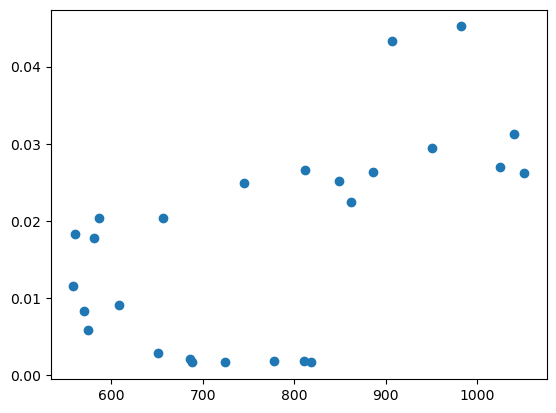

In [65]:
plt.scatter(x = na_data_for_regression["North America Spending"], y = na_data_for_regression["Reports per Capita"])

In [66]:
print(scipy.stats.pearsonr(x = na_data_for_regression["North America Spending"], y = na_data_for_regression["Reports per Capita"]))

PearsonRResult(statistic=0.598761047746324, pvalue=0.0012306061223332034)


In [82]:
# To prevent 0.0 from being converted to NaN before using str on it, we had to
# use astype(str) first (AI assitance).
na_ufo_data["duration (seconds)"] = na_ufo_data["duration (seconds)"].astype(str).str.replace("`", "")
print(na_ufo_data["duration (seconds)"])

0          2700
3            20
4           900
5           300
7          1200
          ...  
88674    1200.0
88675       5.0
88676    1020.0
88677       0.0
88678       0.0
Name: duration (seconds), Length: 74515, dtype: object


C:\Users\alden\AppData\Local\Temp\ipykernel_42144\1859684508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_ufo_data["duration (seconds)"] = na_ufo_data["duration (seconds)"].astype(str).str.replace("`", "")


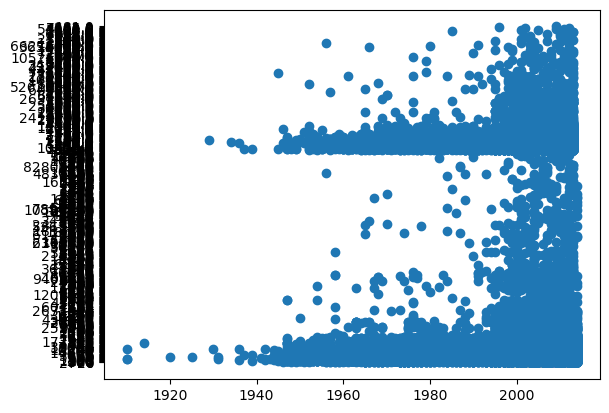

In [72]:

plt.scatter(x = na_ufo_data["Year"], y = na_ufo_data["duration (seconds)"])

In [ ]:
na_ufo_data["datetime"].dt.se

In [88]:
na_ufo_data["Time of Day in Seconds"] = na_ufo_data["datetime"].apply(
    lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second
)
print(na_ufo_data["Time of Day in Seconds"].describe())

count    74515.000000
mean     56811.467221
std      28056.522172
min          0.000000
25%      36900.000000
50%      70500.000000
75%      78300.000000
max      86340.000000
Name: Time of Day in Seconds, dtype: float64


C:\Users\alden\AppData\Local\Temp\ipykernel_42144\2547793260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_ufo_data["Time of Day in Seconds"] = na_ufo_data["datetime"].apply(


<Axes: xlabel='Time of Day in Seconds', ylabel='Count'>

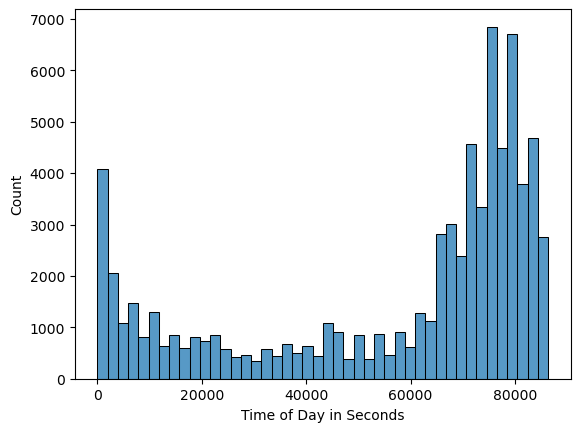

In [89]:
sns.histplot(data = na_ufo_data, x = "Time of Day in Seconds")